In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cek Dataset

In [ ]:
# check quantity of images in training and testing using lambda
import os

train_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/val"

normal_train_path = train_dir + '/normal'
diabetes_retinopati_train_path = train_dir + '/diabetes-retinopati'

normal_val_path = val_dir + '/normal'
diabetes_retinopati_val_path = val_dir + '/diabetes-retinopati'

normal_len_train = len(os.listdir(normal_train_path))
diabetes_retinopati_len_train = len(os.listdir(diabetes_retinopati_train_path))
normal_len_val = len(os.listdir(normal_val_path))
diabetes_retinopati_len_val = len(os.listdir(diabetes_retinopati_val_path))

print("jumlah dataset Training : ", normal_len_train + diabetes_retinopati_len_train)
print("jumlah dataset validasi : ", normal_len_val + diabetes_retinopati_len_val)
print("\n\n")
print("jumlah train kelas normal : ", normal_len_train)
print("jumlah train kelas diabetes-retinopati : ", diabetes_retinopati_len_train)
print("jumlah validasi kelas normal : ", normal_len_val)
print("jumlah validasi kelas  diabetes-retinopati: ", diabetes_retinopati_len_val)


jumlah dataset Training :  390
jumlah dataset validasi :  130



jumlah train kelas normal :  60
jumlah train kelas diabetes-retinopati :  330
jumlah validasi kelas normal :  20
jumlah validasi kelas  diabetes-retinopati:  110


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Augmentasi Dataset

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 390 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dropout

# Arsitektur Model and Fit Model

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(0.0001))

In [ ]:
# Fully Connected Layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 38, 38, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 256)       295168    
                                                                 
 average_pooling2d_2 (Averag  (None, 19, 19, 256)      0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# setting Callback so we can save the best model in format h5 and i save it in my drive
callbacks = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
history = model.fit(train_generator,
                          epochs=60, # images = batch_size * steps
                          verbose=1,
                          validation_data=validation_generator,
                          callbacks = [callbacks, best_model])

Epoch 1/60
20/20 [==============================] - ETA: 0s - loss: 0.6166 - acc: 0.8000
Epoch 00001: val_acc improved from -inf to 0.84615, saving model to /content/drive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5
20/20 [==============================] - 134s 6s/step - loss: 0.6166 - acc: 0.8000 - val_loss: 0.4780 - val_acc: 0.8462
Epoch 2/60
20/20 [==============================] - ETA: 0s - loss: 0.4746 - acc: 0.8462
Epoch 00002: val_acc did not improve from 0.84615
20/20 [==============================] - 23s 1s/step - loss: 0.4746 - acc: 0.8462 - val_loss: 0.4729 - val_acc: 0.8462
Epoch 3/60
20/20 [==============================] - ETA: 0s - loss: 0.4723 - acc: 0.8462
Epoch 00003: val_acc did not improve from 0.84615
20/20 [==============================] - 22s 1s/step - loss: 0.4723 - acc: 0.8462 - val_loss: 0.4630 - val_acc: 0.8462
Epoch 4/60
20/20 [==============================] - ETA: 0s - loss: 0.4577 - acc: 0.8462
Epoch 00004: val_acc did not impro

# Model Evaluation

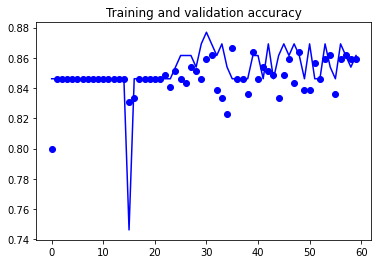

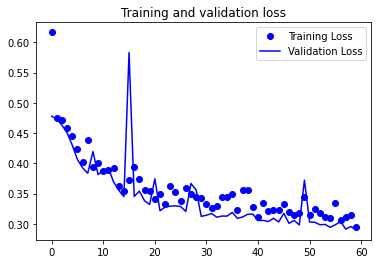

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/drive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5'
model = load_model(model_path)

Found 130 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.8769230769230769
Precision : 0.864438839848676
f1Score : 0.8537324744221295
[[108   2]
 [ 14   6]]


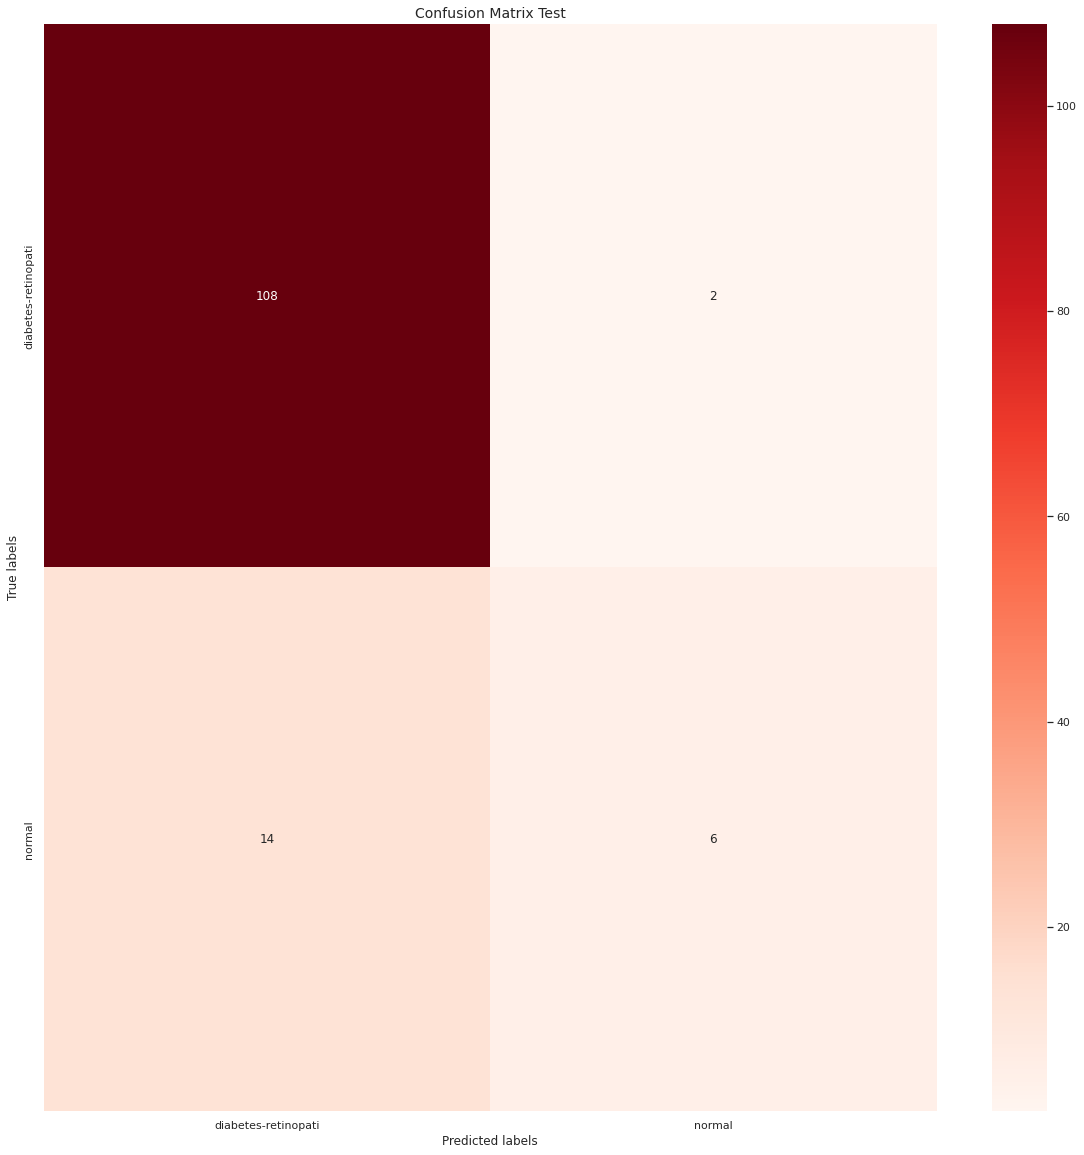

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=20

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/drive/MyDrive/Colab Notebooks/Dataset/val'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

                     precision    recall  f1-score   support

diabetes-retinopati       0.89      0.98      0.93       110
             normal       0.75      0.30      0.43        20

           accuracy                           0.88       130
          macro avg       0.82      0.64      0.68       130
       weighted avg       0.86      0.88      0.85       130



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# loading model to evaluate more depth
import numpy as np
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5'
model = load_model(model_path)

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a normal")
    
  else:
    print(fn + " is a diabetes-retinopati")
 


Saving image004.png to image004.png
[0.99999905]
image004.png is a normal
